In [1]:
%run ../scripts/notebook_settings.py
import sgkit as sg
import xarray as xr
import glob

In [65]:
metadata_dir = "/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/"
metadata_dirs = glob.glob(metadata_dir+"*_individuals.txt")
metadata_dirs

['/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Carlito_individuals.txt',
 '/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Lophocebus_individuals.txt',
 '/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Hoolock_individuals.txt',
 '/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Galago_individuals.txt',
 '/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Saguinus_individuals.txt',
 '/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Papio_individuals.txt',
 '/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Nomascus_individuals.txt',
 '/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Chlorocebus_individuals.txt',
 '/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Cercopithecus_individuals.txt',
 '/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Pygathrix_individuals.txt',
 '/hom

Reading in mutation/generation time estimates from Kuderna. I will assume that chromosome X has 80 % of the mutation rate of autosomes, corresponding to a 4:1 male bias in mutations.

In [2]:
# Mutation rate percentage calc.
(3*1/3+1*2/3)/(3*1/2+1*1/2)

# Even if females have no mutations, it's only 2/3
# (4*1/3+0*2/3)/(4*1/2+0*1/2)

0.8333333333333333

In [3]:
0.75*0.8333333333333333

0.625

In [4]:
kuderna_data = pd.read_csv("../data/science.abn7829_data_s2.csv")

In [5]:
# I pick out the following columns
col_species_mut = ['SPECIES_BINOMIAL', 'GENUS', 'SPECIES', 'FAMILY', 'GENERATION_LENGTH', 'MU_PER_GENERATION',
       'MU_PER_YEAR', 'EFFECTIVE_POP_SIZE']
df_species_mut = kuderna_data[col_species_mut]

<Axes: xlabel='MU_PER_YEAR', ylabel='Count'>

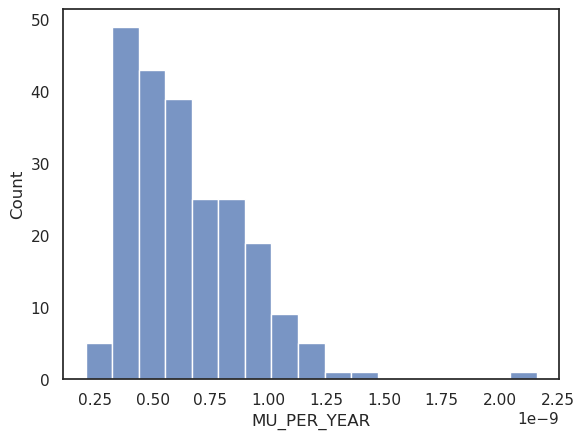

In [6]:
sns.histplot(kuderna_data[col_species_mut].MU_PER_YEAR)

<Axes: xlabel='GENERATION_LENGTH', ylabel='Count'>

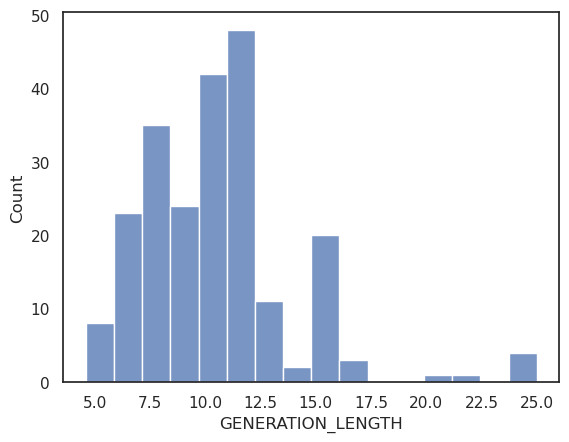

In [7]:
sns.histplot(kuderna_data[col_species_mut].GENERATION_LENGTH)

In [ ]:
g = sns.scatterplot(data=kuderna_data, x="GENERATION_LENGTH", y="MU_PER_YEAR", hue="FAMILY")
plt.legend(bbox_to_anchor=(1.0, 1))

In [ ]:
metadata_dir = "/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/"


metadata_dirs = glob.glob(metadata_dir+"*_individuals.txt")

df_l = []
for d in metadata_dirs:
    # Identify IDs
    dir_metadata = pd.read_csv(d, sep="\t")
    df_l.append(dir_metadata)
all_inds = pd.concat(df_l)

In [ ]:
all_inds.loc[all_inds.GVCF_ID == "PD_0629"]

In [ ]:
df_species_mut.loc[df_species_mut.GENUS == "Carlito"]

In [ ]:
c_list = []
for p in glob.glob("../steps/cobraa/*"):
    if len(glob.glob(p+"/*final_parameters.txt")) >= 1:
        c_list.append(glob.glob(p+"/*final_parameters.txt")[0])
c_list

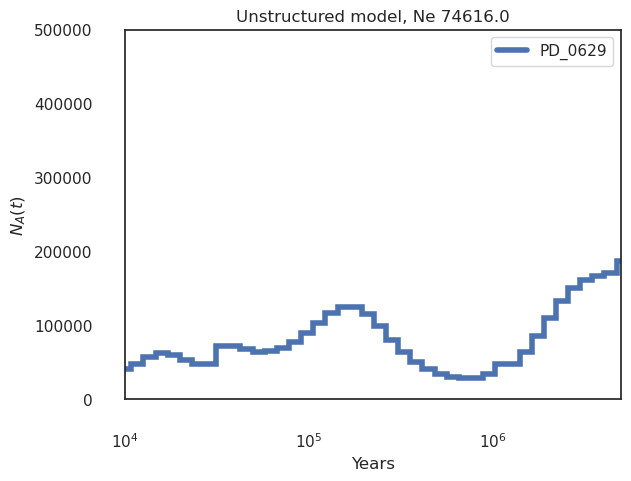

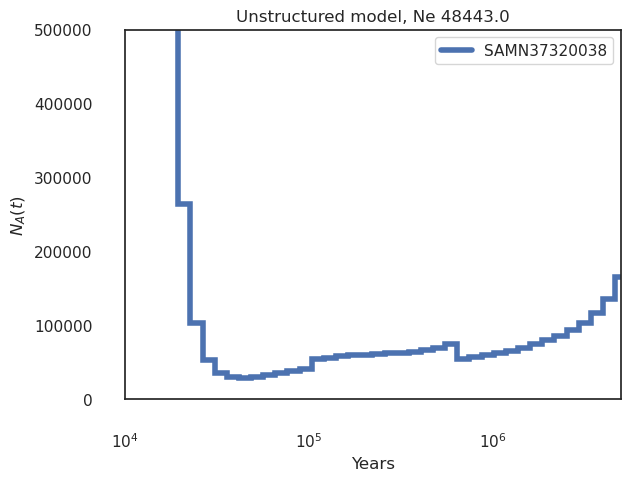

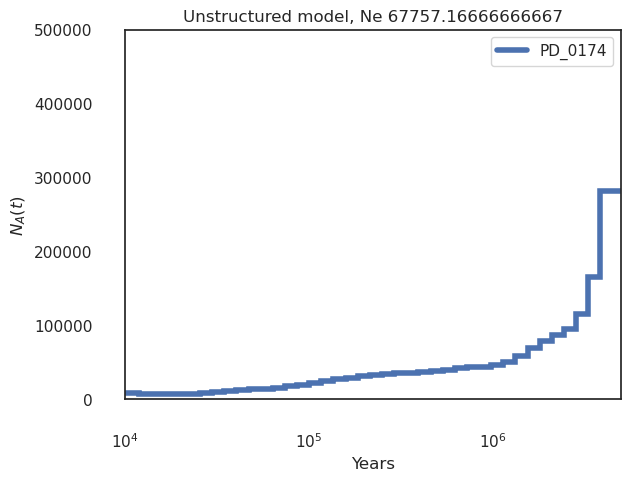

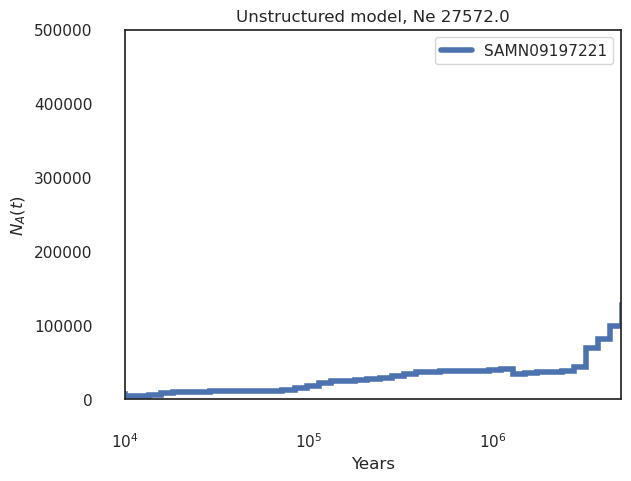

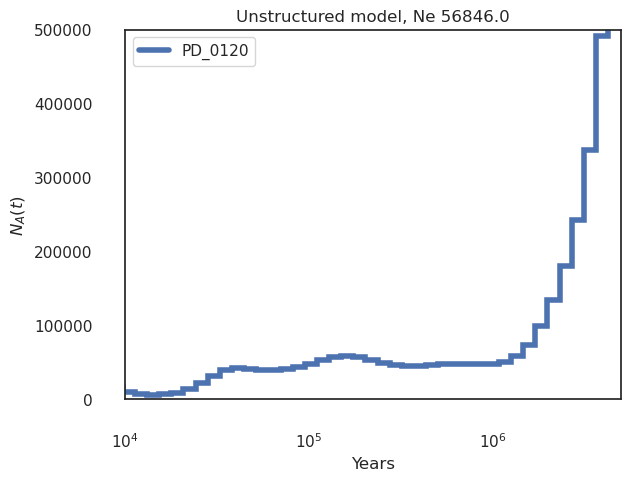

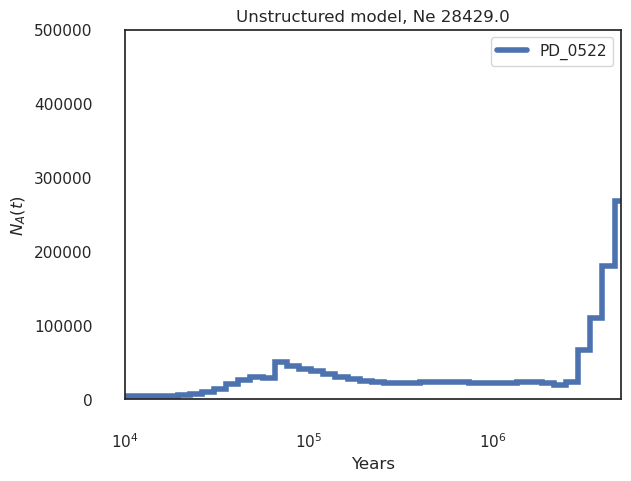

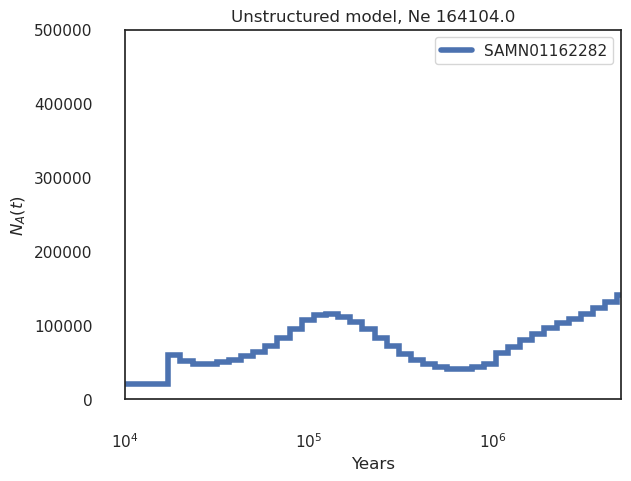

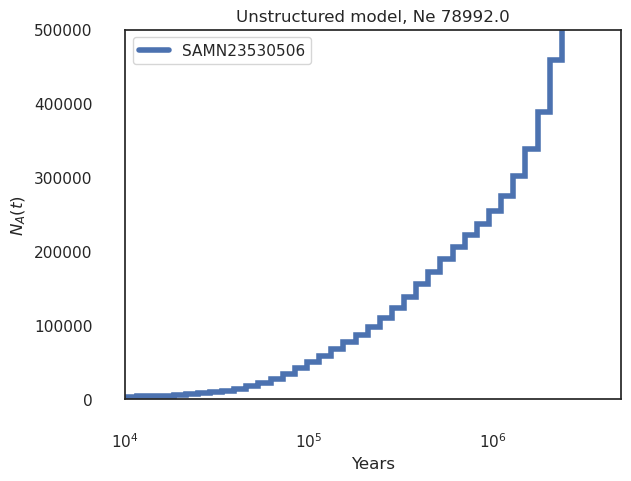

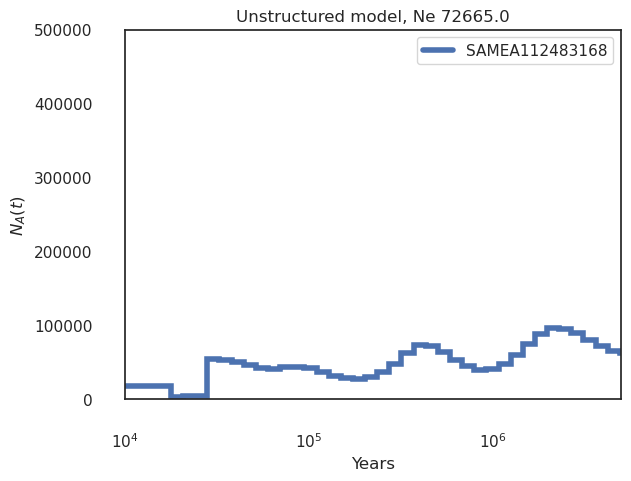

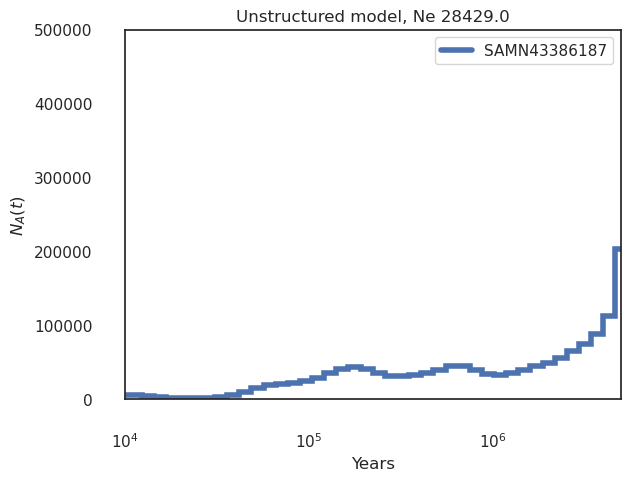

In [13]:
for p in c_list:
    label_tag = p.split("/")[-2]
    ind_inf = all_inds.loc[all_inds.GVCF_ID == label_tag]
    gs = ind_inf.GENUS.iloc[0]+"_"+ind_inf.SPECIES.iloc[0]
    gs_df = df_species_mut.loc[df_species_mut.SPECIES_BINOMIAL == gs]
    g_df = df_species_mut.loc[df_species_mut.GENUS == ind_inf.GENUS.iloc[0]] 
    if len(gs_df) > 0:
        mu = gs_df.MU_PER_GENERATION.mean()
        gen = gs_df.GENERATION_LENGTH.mean()
        kuderna_Ne = gs_df.EFFECTIVE_POP_SIZE.mean()
    elif len(g_df) > 0:
        mu = g_df.MU_PER_GENERATION.mean()
        gen = g_df.GENERATION_LENGTH.mean()
        kuderna_Ne = g_df.EFFECTIVE_POP_SIZE.mean()
    else:
        print(gs)
        continue
    final_params_file = p
    final_params = np.loadtxt(final_params_file)
    time_array = list(final_params[:,1])
    time_array.insert(0,0)
    time_array = np.array(time_array)
    plt.stairs(edges=(time_array/mu)*gen,values=(1/final_params[:,2])/mu,label=label_tag,linewidth=4,linestyle="solid",baseline=None)
    plt.xlim(1e+04,5e+06)
    plt.ylim(0,50e+04)
    plt.xscale('log')
    plt.ylabel('$N_A(t)$')
    plt.xlabel('Years')
    plt.tick_params(which='major',length=20)
    plt.tick_params(which='minor',length=10)
    plt.legend(ncol=2)
    plt.title('Unstructured model, Ne {}'.format(kuderna_Ne))
    plt.show()

In [14]:
final_params_file

'../steps/cobraa/SAMN43386187/CM104434.1_final_parameters.txt'

In [15]:
ind_inf

,BIOSAMPLE_ID,PDGP_ID,GVCF_ID,SRA_SAMPLE_ID,BIOPROJECT_ID,BAM_FOLDER,GVCF_FOLDER,REFERENCE_FOLDER,GENUS,SPECIES,SUBSPECIES,REPORTED_SEX,GENETIC_SEX,AVG_COVERAGE_A,PROP_COVERED_A,AVG_COVERAGE_X,PROP_COVERED_X,AVG_COVERAGE_Y,PROP_COVERED_Y
12,SAMN43386187,SAMN43386187,SAMN43386187,SRS22485649,PRJNA1153068,Hoolock_leuconedys_ssp,Hoolock_leuconedys_ssp,Hoolock_leuconedys_ssp,Hoolock,leuconedys,ssp,F,F,76.517,1.0,70.266,1.0,Unknown,Unknown


Structured check

In [16]:
# Files used
glob.glob("../steps/cobraa/PD_0629/aut_D50*")

['../steps/cobraa/PD_0629/aut_D50_ts10_te34_final_parameters.txt',
 '../steps/cobraa/PD_0629/aut_D50_ts10_te16_final_parameters.txt',
 '../steps/cobraa/PD_0629/aut_D50_ts16_te28_final_parameters.txt',
 '../steps/cobraa/PD_0629/aut_D50_ts4_te40_final_parameters.txt',
 '../steps/cobraa/PD_0629/aut_D50_ts22_te40_final_parameters.txt',
 '../steps/cobraa/PD_0629/aut_D50_ts16_te34_final_parameters.txt',
 '../steps/cobraa/PD_0629/aut_D50_ts34_te40_final_parameters.txt',
 '../steps/cobraa/PD_0629/aut_D50_ts10_te28_final_parameters.txt',
 '../steps/cobraa/PD_0629/aut_D50_ts28_te40_final_parameters.txt',
 '../steps/cobraa/PD_0629/aut_D50_ts16_te22_final_parameters.txt',
 '../steps/cobraa/PD_0629/aut_D50_ts10_te22_final_parameters.txt',
 '../steps/cobraa/PD_0629/aut_D50_ts4_te22_final_parameters.txt',
 '../steps/cobraa/PD_0629/aut_D50_ts28_te34_final_parameters.txt',
 '../steps/cobraa/PD_0629/aut_D50_ts16_te40_final_parameters.txt',
 '../steps/cobraa/PD_0629/aut_D50_ts22_te34_final_parameters.txt

In [17]:
def get_gamma_from_file(file):
    lines = !cat {file}
    return float([i for i in lines if 'gamma' in i][0].split(' ')[-1])
    
def get_LL_from_file(filename):
    with open(filename) as f:
        lines = f.readlines()
    return float([i for i in lines if 'likelihood' in i and 'final' in i][0].split(' ')[-1])

for p in glob.glob("../steps/cobraa/PD_0313/aut_fi*"):
    print(get_LL_from_file(p), p)
    aut_LL = get_LL_from_file(p)

for p in glob.glob("../steps/cobraa/PD_0313/aut_D5*"):
    print(get_gamma_from_file(p), get_LL_from_file(p)-aut_LL, p)
    

-3165403.5865531787 ../steps/cobraa/PD_0313/aut_final_parameters.txt
0.4962136959658122 -5.37241280451417 ../steps/cobraa/PD_0313/aut_D50_ts4_te10_final_parameters.txt
0.05282088417992215 171.48858986236155 ../steps/cobraa/PD_0313/aut_D50_ts34_te40_final_parameters.txt
0.36312073563469116 1303.247873544693 ../steps/cobraa/PD_0313/aut_D50_ts10_te28_final_parameters.txt
0.33667853489263483 1198.711476684548 ../steps/cobraa/PD_0313/aut_D50_ts4_te28_final_parameters.txt
0.12098728072522144 470.99925832264125 ../steps/cobraa/PD_0313/aut_D50_ts16_te34_final_parameters.txt
0.014834809181644764 6.753147688694298 ../steps/cobraa/PD_0313/aut_D50_ts22_te40_final_parameters.txt
0.44104384367556476 -3.1520788986235857 ../steps/cobraa/PD_0313/aut_D50_ts10_te16_final_parameters.txt
0.38493595080358733 1222.7063154885545 ../steps/cobraa/PD_0313/aut_D50_ts16_te28_final_parameters.txt
0.11091481744125618 354.3111547762528 ../steps/cobraa/PD_0313/aut_D50_ts4_te34_final_parameters.txt
0.11781939078888408 

In [18]:
f = open("../steps/cobraa/PD_0313/aut_D50_ts10_te28_final_parameters.txt", "r")
print(f.readlines()[:9])

['# final log likelihood = -3164100.338679634\n', '# final change in log likelihood = 63.564694113098085\n', '# number of iterations taken = 20\n', '# theta=4*N_E*mu = 0.0025184377263154454\n', '# rho=4*N_E*r = 0.0011692306313039718\n', '# scale time by dividing by mu\n', '# scale lambda by taking its inverse then dividing by mu\n', '# col 0 is left time boundary; col 1 is right time boundary; col 3 is scaled_lambda_A; col 4 is scaled_lambda_B\n', '0.000000000000000000e+00 1.158101829227505153e-05 3.666983874751247754e+02 3.177232807655425972e+02\n']


In [19]:
f = open("../steps/cobraa/PD_0313/aut_D50_ts10_te28_final_parameters.txt", "r")
print(f.readlines()[-2])

1.709794645466339302e-02 1.990530765736224159e-02 7.085318807627650131e+03 3.177232807655425972e+02



In [20]:
final_params_file = "../steps/cobraa/PD_0313/aut_D50_ts10_te28_final_parameters.txt"
with open(final_params_file) as f:
    finallines = f.readlines()
ztheta = float([i for i in finallines if 'theta' in i ][0].split(' ')[-1])
zrho = float([i for i in finallines if 'rho' in i ][0].split(' ')[-1])
zgamma = float([i for i in finallines if 'gamma' in i ][0].split(' ')[-1])
    
final_params = np.loadtxt(final_params_file)
lambdaA_parameters = final_params[:,2]*ztheta/4
lambdaB_parameters = final_params[:,3]*ztheta/4

In [21]:
np.loadtxt(final_params_file)

array([[0.00000000e+00, 1.15810183e-05, 3.66698387e+02, 3.17723281e+02],
       [1.15810183e-05, 1.34825391e-05, 1.89303741e+03, 3.17723281e+02],
       [1.34825391e-05, 1.56962762e-05, 1.95750523e+03, 3.17723281e+02],
       [1.56962762e-05, 1.82734931e-05, 2.37850139e+03, 3.17723281e+02],
       [1.82734931e-05, 2.12738707e-05, 3.19804165e+03, 3.17723281e+02],
       [2.12738707e-05, 2.47668889e-05, 4.13473110e+03, 3.17723281e+02],
       [2.47668889e-05, 2.88334359e-05, 4.63185974e+03, 3.17723281e+02],
       [2.88334359e-05, 3.35676810e-05, 4.44031499e+03, 3.17723281e+02],
       [3.35676810e-05, 3.90792555e-05, 3.89608217e+03, 3.17723281e+02],
       [3.90792555e-05, 4.54957914e-05, 3.38518595e+03, 3.17723281e+02],
       [4.54957914e-05, 5.29658767e-05, 4.45477662e+03, 3.17723281e+02],
       [5.29658767e-05, 6.16624970e-05, 3.96856284e+03, 3.17723281e+02],
       [6.16624970e-05, 7.17870404e-05, 3.50213168e+03, 3.17723281e+02],
       [7.17870404e-05, 8.35739619e-05, 3.11323362e

In [22]:
",".join([str(x) for x in final_params[:,2]*ztheta/4])

'0.23087676329909837,1.1918742059065959,1.2324637538530463,1.4975269054234883,2.013517182955232,2.603265696417167,2.916262576871493,2.7956641998139875,2.4530100832472423,2.131345000420639,2.8047693763893826,2.4986445965674364,2.2049751367126547,1.9601212473127851,1.7757973345217892,1.6316073877975024,1.5416348903595376,1.5341022814711742,1.6211688137580522,1.8018550600896968,2.0751550845875824,2.450810092832128,2.9629264717989745,3.69439285465338,4.837739114815185,4.999961949487317,4.9999340463444275,4.999939186253933,0.9570683450224202,0.9727296806791061,1.020029292482623,1.097893810351519,1.196029533773705,1.2944362192323147,1.3628107145600208,1.371598289542252,1.3065368684976435,1.177724974495165,1.0128708187166082,0.8435003948389052,0.6856586966925501,0.530946841486948,0.3685412303389101,0.2192959759858522,0.11562667557439815,0.10003688436919514,0.10003688436919514,0.10003688436919514,0.10003688436919514,4.46098354702546'

In [23]:
len(lambdaB_parameters)

50

In [24]:
ztheta, zrho, zgamma

(0.0025184377263154454, 0.0011692306313039718, 0.36312073563469116)

In [25]:
#PD_0010: Likelihoods can both be better and worse than unstructured.
-1442522.7799575876-(-1442661.2414622284), -1442684.337433766-(-1442661.2414622284)

(138.46150464075617, -23.09597153775394)

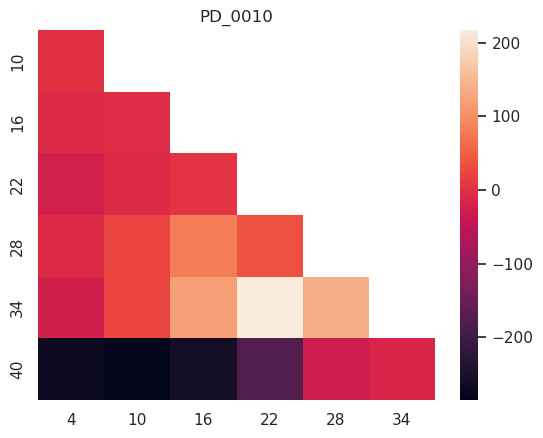

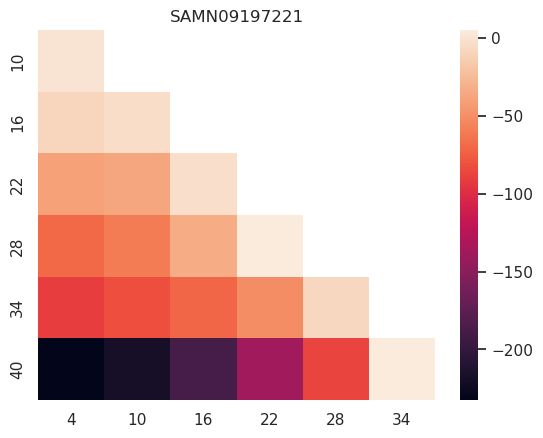

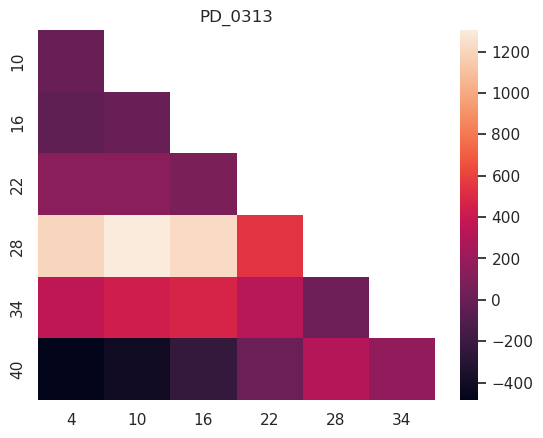

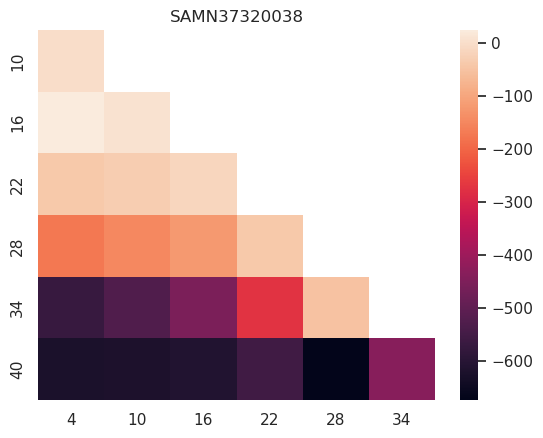

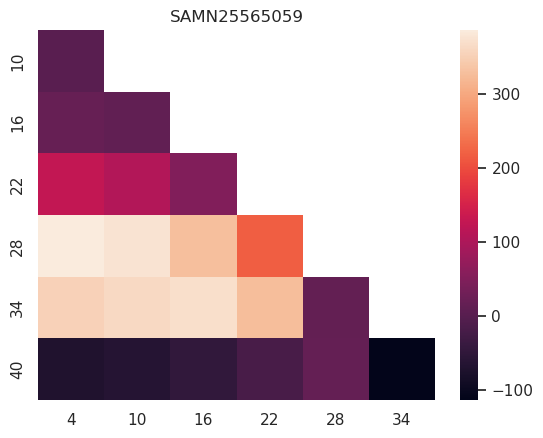

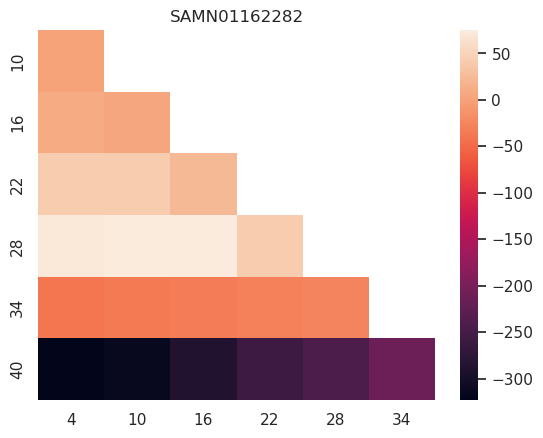

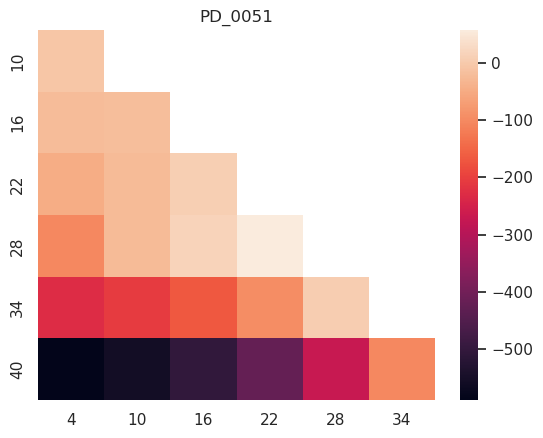

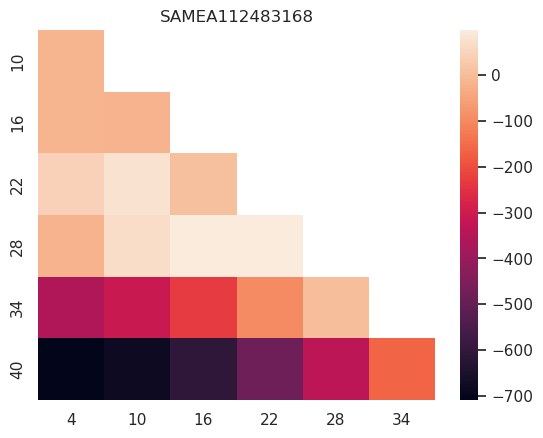

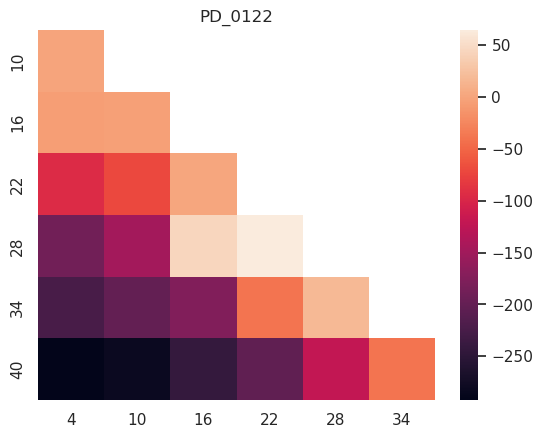

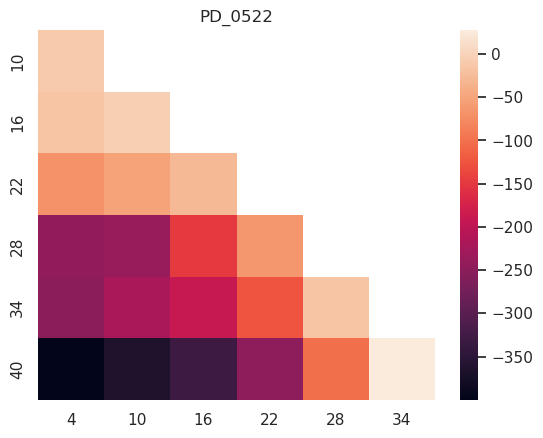

<Figure size 640x480 with 0 Axes>

In [26]:
for ind in ["PD_0010", "SAMN09197221", "PD_0313", "SAMN37320038", "SAMN25565059",
           "SAMN01162282", "PD_0051", "SAMEA112483168", "PD_0122", "PD_0522"]:
    final_params_file_pan = f'../steps/cobraa/{ind}/aut_final_parameters.txt'
    pan_LL = get_LL_from_file(final_params_file_pan)
    matrix_LL_diffs = np.zeros(shape=(6,6))
    matrix_LL_diffs[:] = np.nan
    for te in range(10, 42, 6):
        for ts in range(4, te-4, 6):
            final_params_file_struct = f'../steps/cobraa/{ind}/aut_D50_ts{ts}_te{te}_final_parameters.txt'
            struct_LL = get_LL_from_file(final_params_file_struct)
            diff_LL = struct_LL - pan_LL
            matrix_LL_diffs[int((te-6)/6),int(ts/6)] = diff_LL
    matrix_LL_diffs = matrix_LL_diffs
    g = sns.heatmap(matrix_LL_diffs)
    g.set(xticklabels=list(range(4, te-4, 6)), yticklabels=list(range(10, 42, 6)),title=ind)
    plt.figure()

In [27]:
matrix_LL_diffs

array([[ -10.08007782,           nan,           nan,           nan,
                  nan,           nan],
       [ -17.160373  ,   -5.85190262,           nan,           nan,
                  nan,           nan],
       [ -67.79226323,  -52.26071701,  -29.04771889,           nan,
                  nan,           nan],
       [-244.23448636, -237.91657671, -148.5139991 ,  -64.28079348,
                  nan,           nan],
       [-248.43192286, -220.74301042, -190.00395127, -126.02551631,
         -15.9975515 ,           nan],
       [-399.98256782, -365.67118595, -332.08006798, -246.82966856,
        -102.01613357,   27.48199221]])

Decode checks

In [28]:


def get_all_A_indices(D_flat,ts,te):
    pre_struct = [i for i in range(0,ts)]
    in_struct = [ts + (j)*2 for j in range(0,te-ts)]
    post_struct = [ts + (te-ts)*2 + (j)*3 for j in range(0,D-te)]
    all_A_indices = pre_struct + in_struct + post_struct
    return all_A_indices

def get_all_B_indices(D_flat,ts,te):
    in_struct = [ts + ((j)*2+1) for j in range(0,te-ts)]
    post_struct = [ts + (te-ts)*2+ (j)*3+1 for j in range(0,D-te)]
    all_B_indices = in_struct + post_struct
    return all_B_indices


def get_AB_poststruct_indices(D_flat,ts,te):
    AB_indices = [ts + (te-ts)*2 + (j)*3+2 for j in range(0,D-te)]
    return AB_indices

In [52]:
D = 50 # number of discrete time intervals in the HMM
T_1 = 10 # composite ML estimate of admixture time
T_2 = 28 # composite ML estimate of divergence time
T_2_flat = T_1+(T_2-T_1)*2 # index of T_2 in flatten HMM transition matrix
D_flat = T_1 + (T_2-T_1)*2 + (D-T_2)*3 # number of indices in posterior decoding; there are 32 time intervals and T_1 and T_2 are 13 and 21 respectively. Before T_1 only c=AA is possible; between T_1 and T_2 c=AA or C=BB is possible; after T_2 c=AA, c=BB and c=AB are possible
all_A = get_all_A_indices(D_flat,T_1,T_2) # indices of c=AA
all_B = get_all_B_indices(D_flat,T_1,T_2) # indices of c=BB ( implicitly, t>T_1 for c=BB to have non zero probability)
all_AB = get_AB_poststruct_indices(D_flat,T_1,T_2) # indices of c=AB
all_A_given_t_bigger_ts = [i for i in all_A if i>=T_1] # indices of c=AA and t>T_1
all_A_given_t_bigger_te = [i for i in all_A if i>=T_2_flat] # indices of c=AA and t>T_2
all_B_given_t_bigger_te = [i for i in all_B if i>=T_2_flat] # indices of c=B and t>T_2
all_AB_given_t_bigger_te = [i for i in all_AB if i>=T_2_flat] # indices of c=AB and t>T_2
all_A_given_t_bigger_ts_smaller_te = [i for i in all_A if i>=T_1 and i<T_2_flat] # indices of c=AA and T_1<t<T_2
all_B_given_t_bigger_ts_smaller_te = [i for i in all_B if i>=T_1 and i<T_2_flat] # indices of c=BB and T_1<t<T_2
t_in_structured_period = [i for i in range(T_1,T_2_flat)] # index of t for structured period
step_size=400*25 # length between base pairs of posterior decoding

In [53]:

decode_file = "../steps/cobraa/PD_0313/aut_CM080815.1_decode.txt"# change to path of decoding file
decode = np.loadtxt(decode_file) # load file
decode_position = decode[0,:] # get the genomic position
posterior = decode[1:,:] # get the full posterior, this must sum to 1

prob_AA_marginal = posterior[all_A,:].sum(axis=0) # P(c=AA|X)
prob_BB_marginal = posterior[all_B,:].sum(axis=0) # P(c=BB|X)
prob_AB_marginal = posterior[all_AB,:].sum(axis=0) # # P(c=AB|X)

In [54]:
prob_BB_marginal.argmax()

399

In [55]:
prob_AA_marginal.sum(), prob_BB_marginal.sum(), prob_AB_marginal.sum()

(9345.824345827277, 3400.412920345384, 10763.762733827338)

In [56]:
step_size*100

1000000

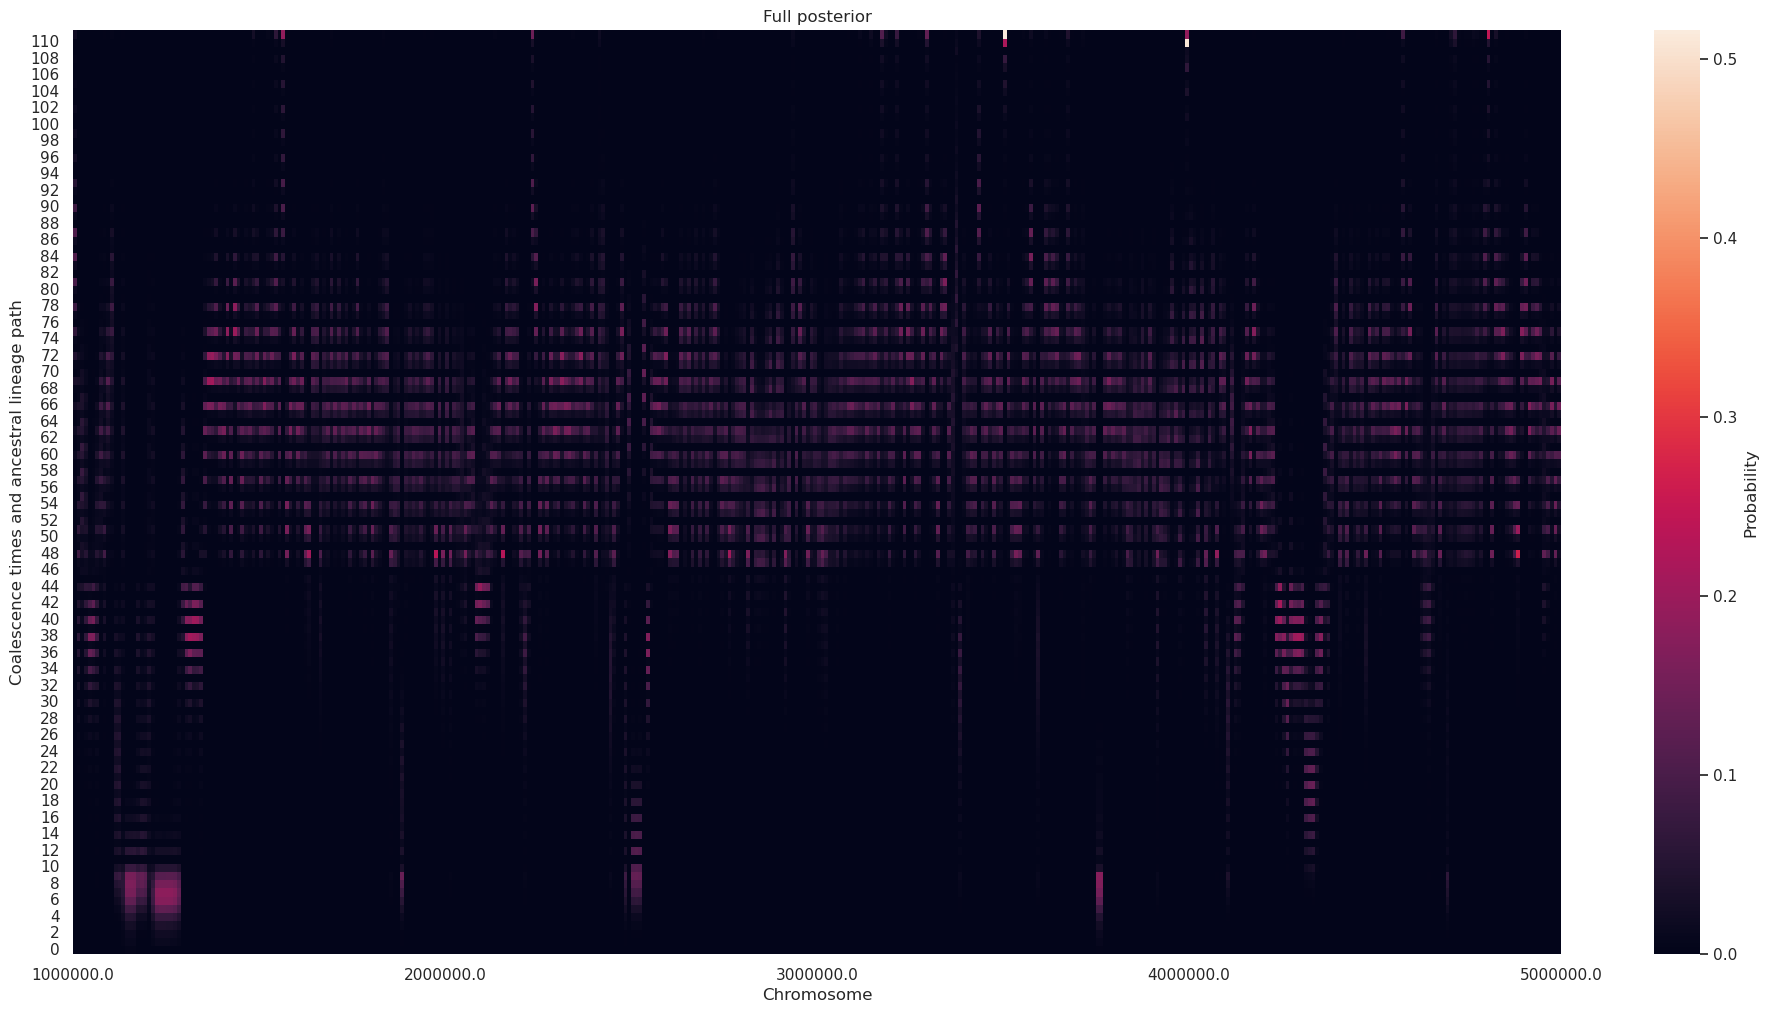

In [60]:
start = 100
end = 500
num_xticks = 5
xtickslocs = np.linspace(start,end,num_xticks) - start
xtickslabs = [i for i in np.linspace(start,end,num_xticks)*step_size]

plt.rcParams['figure.figsize'] = [24, 12] 
plt.rcParams.update({'font.size': 25})

np.linspace(start,end,num_xticks)*step_size

# full posterior (coalescence times and lineage paths)
ax = sns.heatmap(posterior[:,start:end],cbar_kws={'label': 'Probability'})
# ax.set_yticks(ticks=ydom,labels=yticks_labs,rotation='horizontal')
ax.set_xticks(ticks=xtickslocs,labels=xtickslabs,rotation='horizontal')
ax.set_xlabel('Chromosome')
ax.set_ylabel('Coalescence times and ancestral lineage path')
ax.invert_yaxis()
ax.set_title('Full posterior')

plt.show()

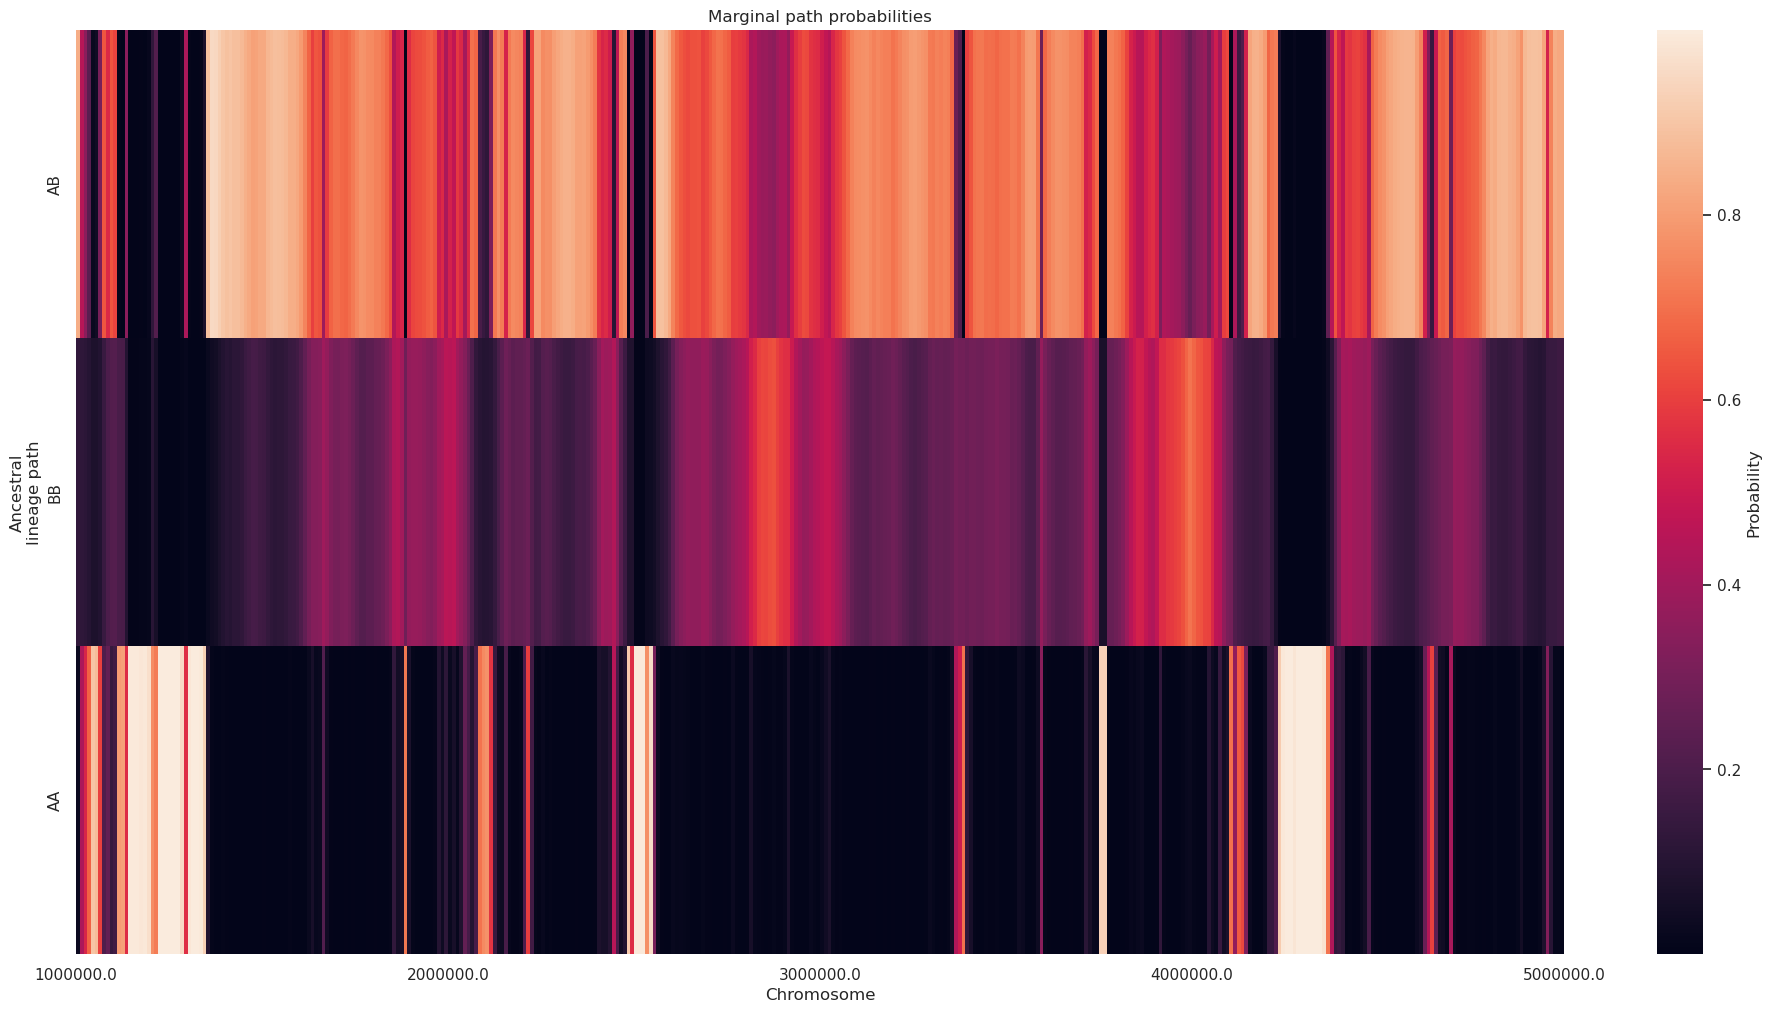

In [61]:
# No conditioning
probs = np.array([prob_AA_marginal,prob_BB_marginal,prob_AB_marginal])
ax = sns.heatmap(probs[:,start:end],cbar_kws={'label': 'Probability'})
# ax.set_yticks(ticks=ydom,labels=yticks_labs,rotation='horizontal')
ax.set_xticks(ticks=xtickslocs,labels=xtickslabs,rotation='horizontal')
ax.set_xlabel('Chromosome')
ax.set_ylabel('Ancestral\nlineage path')
plt.yticks([0.5,1.5,2.5],['AA','BB','AB'])
ax.invert_yaxis()
ax.set_title('Marginal path probabilities')
plt.show()

<Axes: ylabel='Count'>

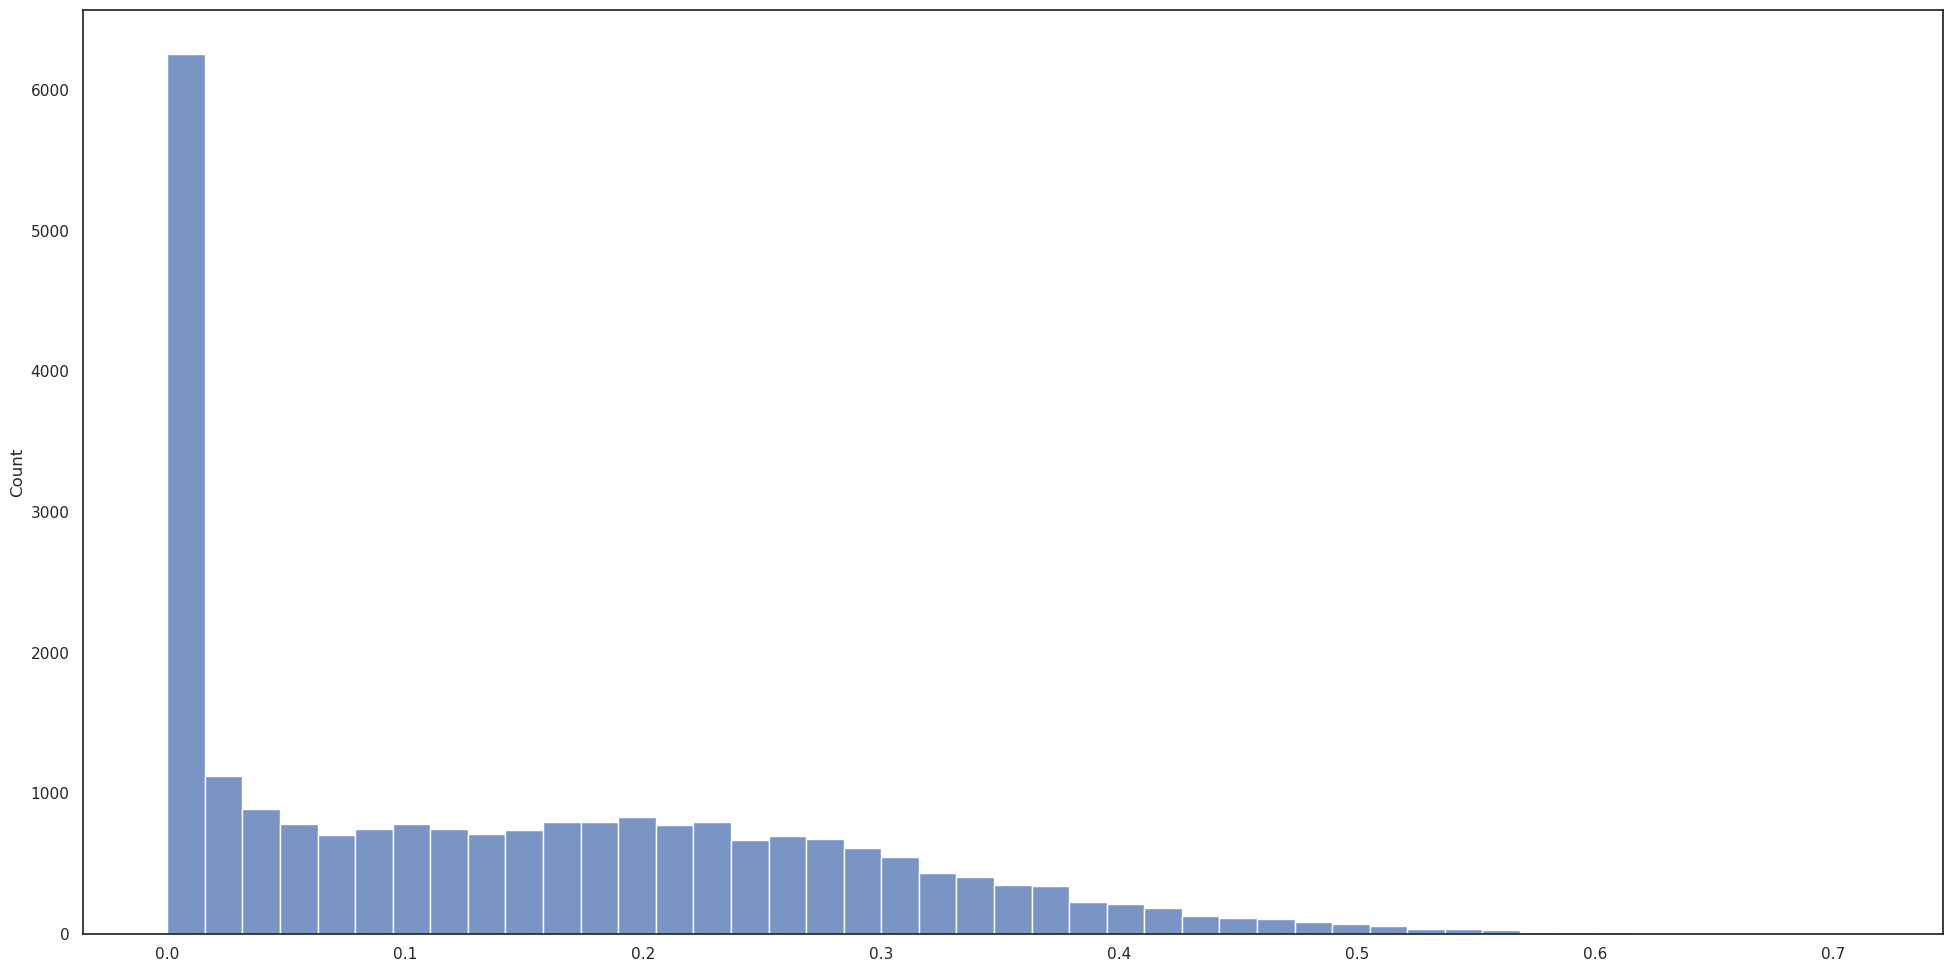

In [36]:
sns.histplot(prob_BB_marginal)

In [63]:
BB_df = pd.DataFrame({"window_start": list(range(0, len(prob_BB_marginal)*step_size, step_size)),
                      "prob_BB": prob_BB_marginal})
BB_df

,window_start,prob_BB
0,0,0.209610
1,10000,0.222454
2,20000,0.223258
3,30000,0.229222
4,40000,0.203216
...,...,...
23505,235050000,0.000316
23506,235060000,0.000378
23507,235070000,0.000533
23508,235080000,0.008066


<Axes: xlabel='window_start', ylabel='prob_BB'>

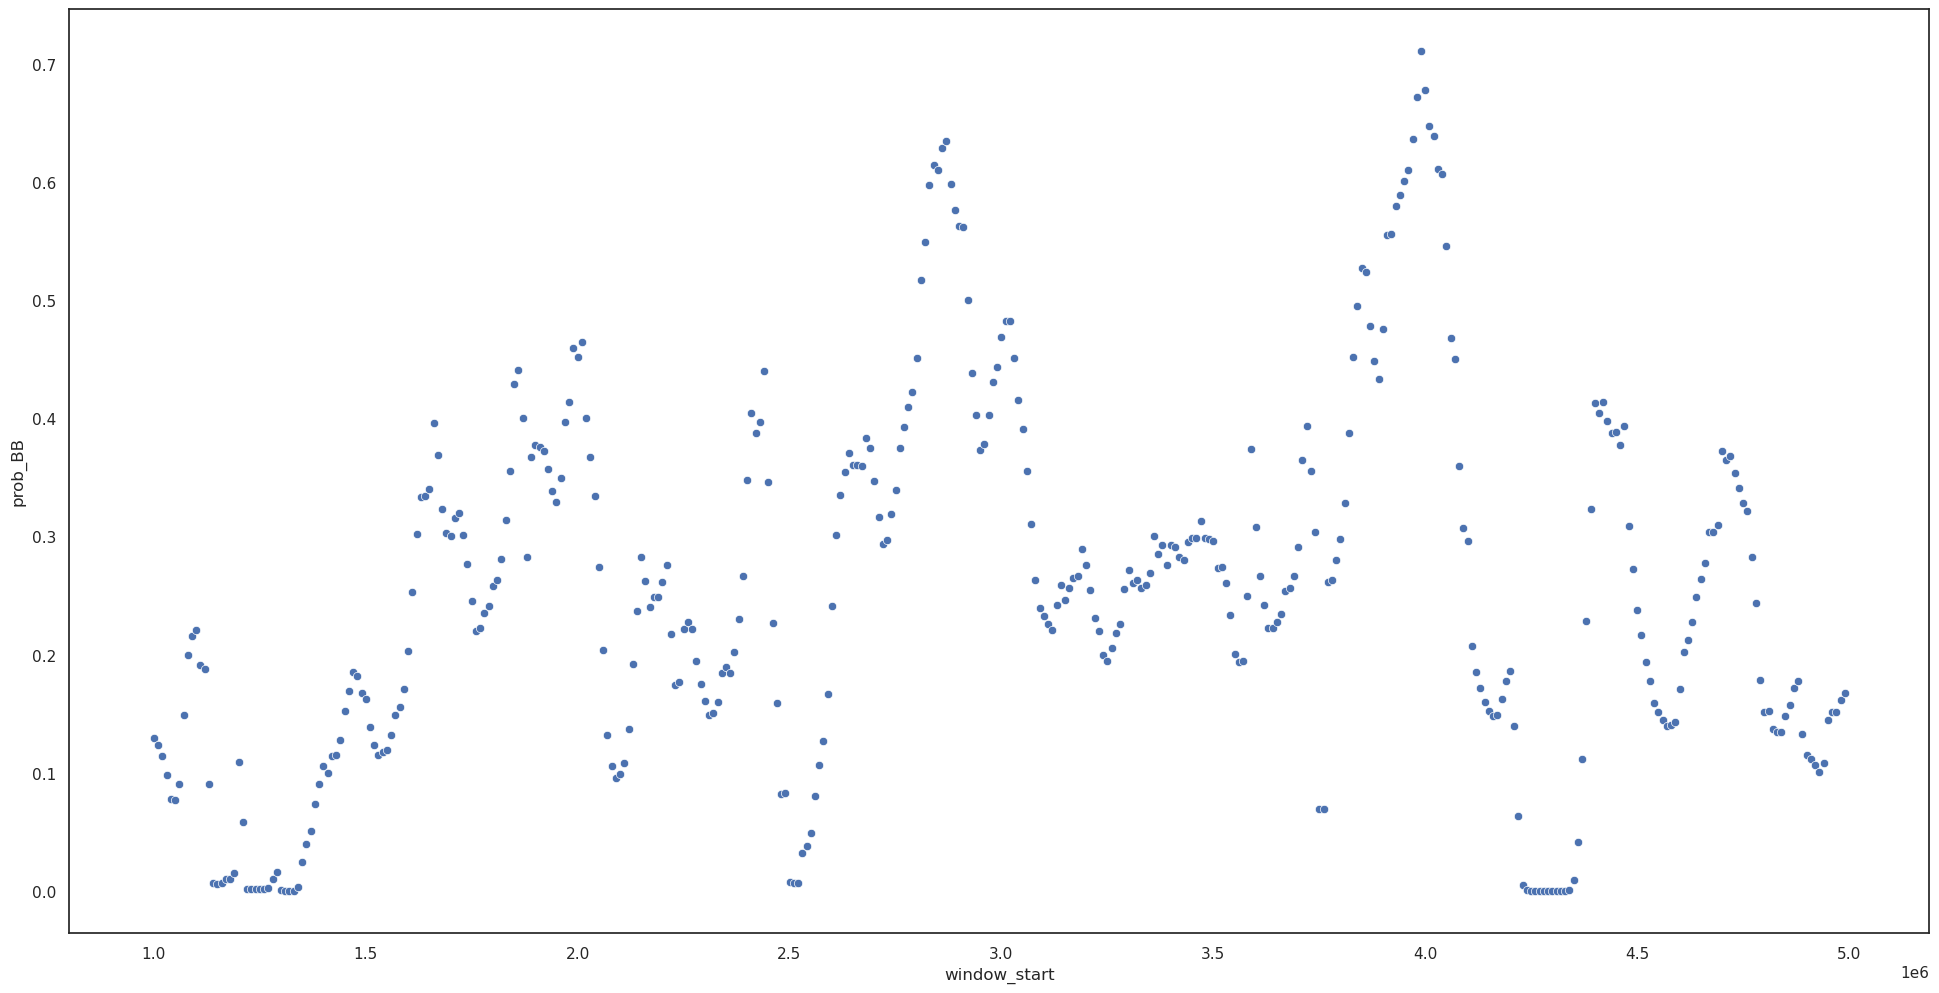

In [62]:
sns.scatterplot(data=BB_df.iloc[100:500], x="window_start", y="prob_BB")

"Worse" example.

In [39]:
D = 50 # number of discrete time intervals in the HMM
T_1 = 22 # composite ML estimate of admixture time
T_2 = 34 # composite ML estimate of divergence time
T_2_flat = T_1+(T_2-T_1)*2 # index of T_2 in flatten HMM transition matrix
D_flat = T_1 + (T_2-T_1)*2 + (D-T_2)*3 # number of indices in posterior decoding; there are 32 time intervals and T_1 and T_2 are 13 and 21 respectively. Before T_1 only c=AA is possible; between T_1 and T_2 c=AA or C=BB is possible; after T_2 c=AA, c=BB and c=AB are possible
all_A = get_all_A_indices(D_flat,T_1,T_2) # indices of c=AA
all_B = get_all_B_indices(D_flat,T_1,T_2) # indices of c=BB ( implicitly, t>T_1 for c=BB to have non zero probability)
all_AB = get_AB_poststruct_indices(D_flat,T_1,T_2) # indices of c=AB
all_A_given_t_bigger_ts = [i for i in all_A if i>=T_1] # indices of c=AA and t>T_1
all_A_given_t_bigger_te = [i for i in all_A if i>=T_2_flat] # indices of c=AA and t>T_2
all_B_given_t_bigger_te = [i for i in all_B if i>=T_2_flat] # indices of c=B and t>T_2
all_AB_given_t_bigger_te = [i for i in all_AB if i>=T_2_flat] # indices of c=AB and t>T_2
all_A_given_t_bigger_ts_smaller_te = [i for i in all_A if i>=T_1 and i<T_2_flat] # indices of c=AA and T_1<t<T_2
all_B_given_t_bigger_ts_smaller_te = [i for i in all_B if i>=T_1 and i<T_2_flat] # indices of c=BB and T_1<t<T_2
t_in_structured_period = [i for i in range(T_1,T_2_flat)] # index of t for structured period
step_size=400*25 # length between base pairs of posterior decoding

In [40]:

decode_file = "../steps/cobraa/PD_0010/aut_NC_071443.1_decode.txt"# change to path of decoding file
decode = np.loadtxt(decode_file) # load file
decode_position = decode[0,:] # get the genomic position
posterior = decode[1:,:] # get the full posterior, this must sum to 1

prob_AA_marginal = posterior[all_A,:].sum(axis=0) # P(c=AA|X)
prob_BB_marginal = posterior[all_B,:].sum(axis=0) # P(c=BB|X)
prob_AB_marginal = posterior[all_AB,:].sum(axis=0) # # P(c=AB|X)

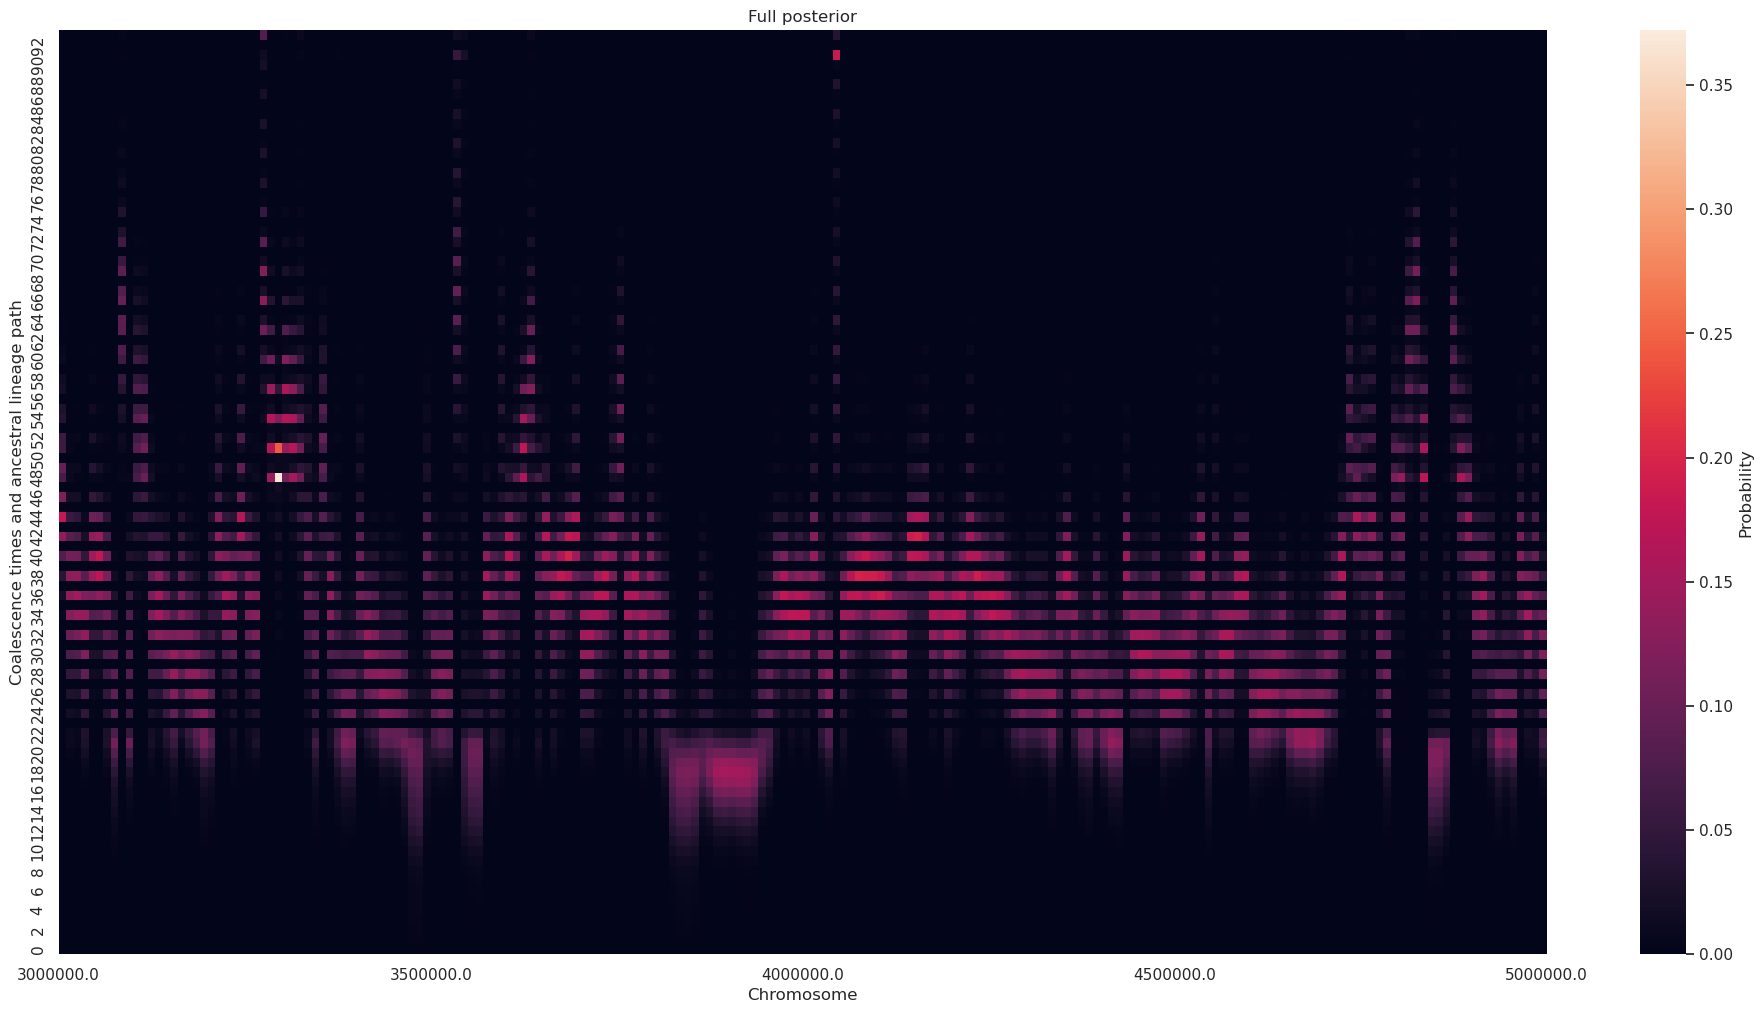

In [49]:
start = 300
end = 500
num_xticks = 5
xtickslocs = np.linspace(start,end,num_xticks) - start
xtickslabs = [i for i in np.linspace(start,end,num_xticks)*step_size]

plt.rcParams['figure.figsize'] = [24, 12] 
plt.rcParams.update({'font.size': 25})

np.linspace(start,end,num_xticks)*step_size

# full posterior (coalescence times and lineage paths)
ax = sns.heatmap(posterior[:,start:end],cbar_kws={'label': 'Probability'})
# ax.set_yticks(ticks=ydom,labels=yticks_labs,rotation='horizontal')
ax.set_xticks(ticks=xtickslocs,labels=xtickslabs,rotation='horizontal')
ax.set_xlabel('Chromosome')
ax.set_ylabel('Coalescence times and ancestral lineage path')
ax.invert_yaxis()
ax.set_title('Full posterior')

plt.show()

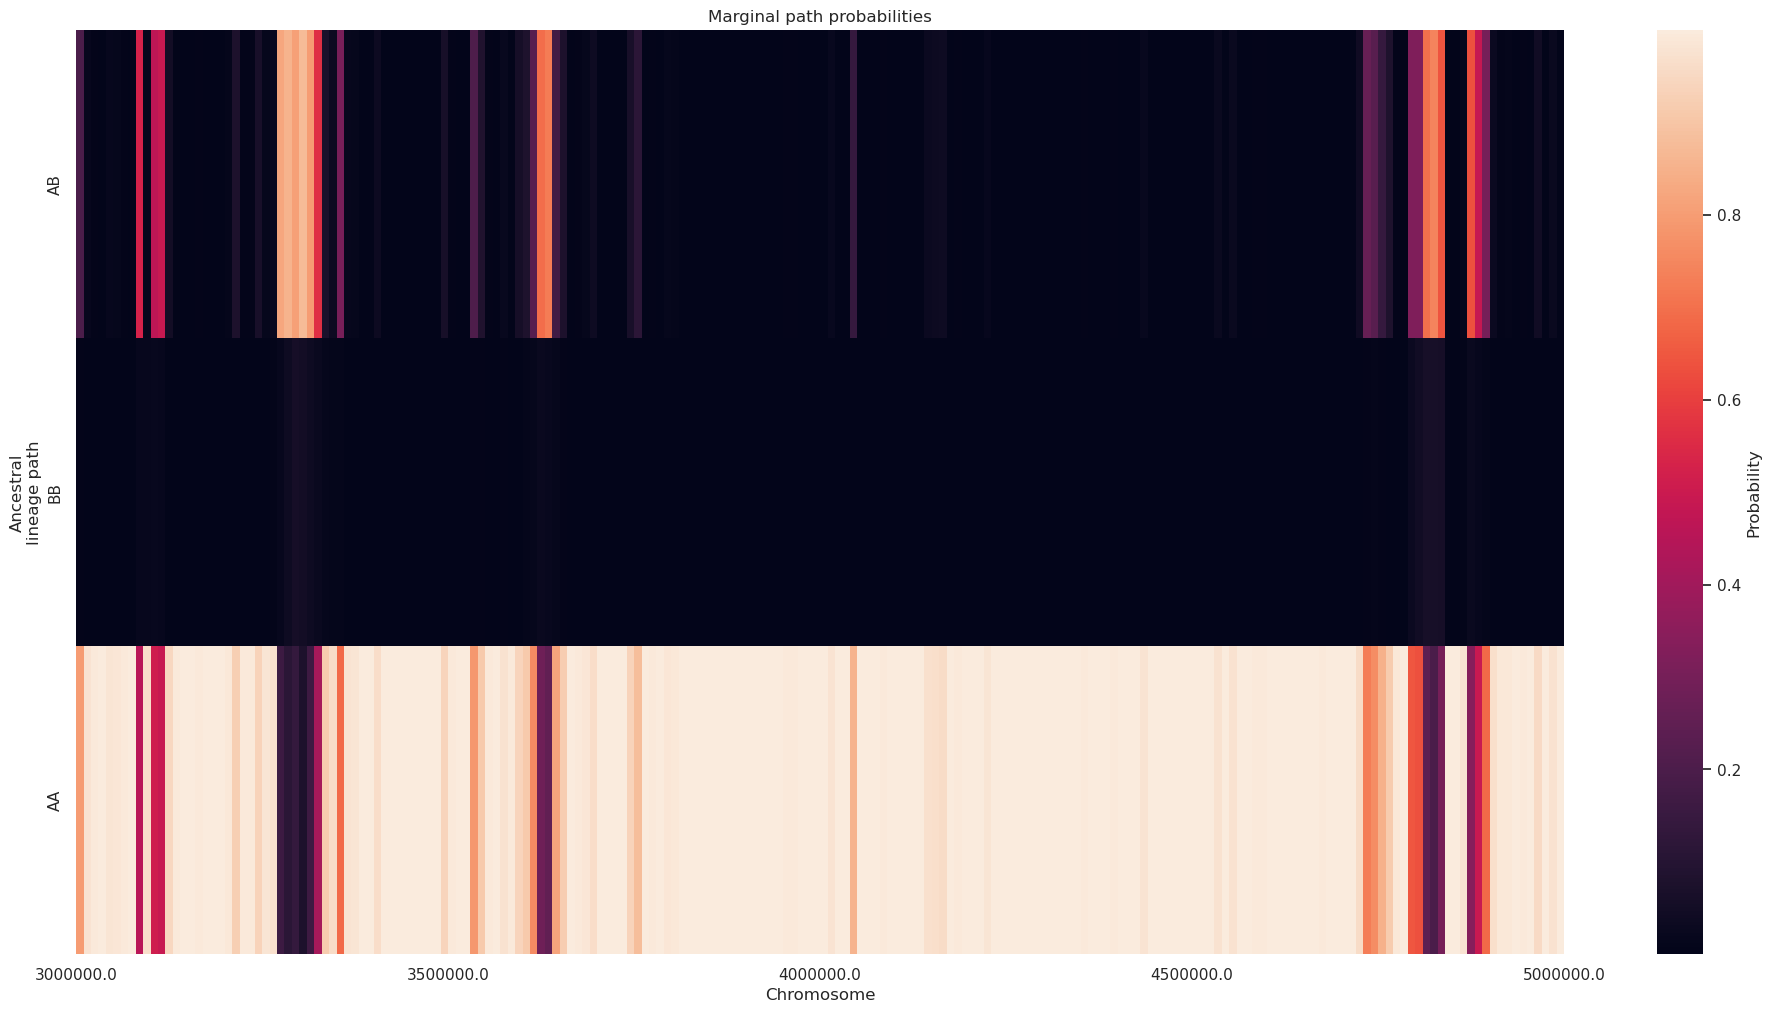

In [51]:
# No conditioning
probs = np.array([prob_AA_marginal,prob_BB_marginal,prob_AB_marginal])
ax = sns.heatmap(probs[:,start:end],cbar_kws={'label': 'Probability'})
# ax.set_yticks(ticks=ydom,labels=yticks_labs,rotation='horizontal')
ax.set_xticks(ticks=xtickslocs,labels=xtickslabs,rotation='horizontal')
ax.set_xlabel('Chromosome')
ax.set_ylabel('Ancestral\nlineage path')
plt.yticks([0.5,1.5,2.5],['AA','BB','AB'])
ax.invert_yaxis()
ax.set_title('Marginal path probabilities')
plt.show()